In [1]:
import pandas as pd

# specify the path of the CSV file
csv_file_path = 'housePrice.csv'

# read the CSV file using pandas
data = pd.read_csv(csv_file_path)

# print the data to check if it has been read correctly
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3468,86,2,True,True,True,Southern Janatabad,3500000000
3469,83,2,True,True,True,Niavaran,6800000000
3470,75,2,False,False,False,Parand,365000000
3471,105,2,True,True,True,Dorous,5600000000


Preparing 

In [2]:
# count NaN values in the DataFrame
count_nan = data.isna().sum().sum()

# print the count of NaN values
print("Count of NaN values:", count_nan)

Count of NaN values: 23


In [3]:
# drop rows with missing values
data.dropna(inplace=True)

# count NaN values in the DataFrame
count_nan = data.isna().sum().sum()

# print the count of NaN values
print("Count of NaN values:", count_nan)

Count of NaN values: 0


In [4]:
# calculate the quartiles of the price column
quartiles = data['Price'].describe()[4:8]

# create a function to map price values to price levels
def map_price_to_level(price):
    if price <= quartiles[0]:
        return 'cheap'
    elif price <= quartiles[1]:
        return 'underMean'
    elif price <= quartiles[2]:
        return 'upperMean'
    else:
        return 'expensive'

# add a new column called priceLevel based on price quartiles
data['priceLevel'] = data['Price'].apply(map_price_to_level)


print(f"Q1: {quartiles[0]}, Q2: {quartiles[1]}, Q3: {quartiles[2]}")
# print the updated data to check the new column has been added
data.head()

Q1: 1419250000.0, Q2: 2900000000.0, Q3: 6000000000.0


,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
0,63,1,True,True,True,Shahran,1850000000,underMean
1,60,1,True,True,True,Shahran,1850000000,underMean
2,79,2,True,True,True,Pardis,550000000,cheap
3,95,2,True,True,True,Shahrake Qods,902500000,cheap
4,123,2,True,True,True,Shahrake Gharb,7000000000,expensive


In [5]:
data.describe()

,Area,Room,Price
count,3450.000000,3450.000000,3.450000e+03
mean,106.917391,2.081159,5.375563e+09
std,69.550976,0.760216,8.125918e+09
min,30.000000,0.000000,3.600000e+06
25%,69.000000,2.000000,1.419250e+09
50%,90.000000,2.000000,2.900000e+09
75%,120.000000,2.000000,6.000000e+09
max,929.000000,5.000000,9.240000e+10


In [6]:
# print the data types of each column
print(data.dtypes)

Area           int64
Room           int64
Parking         bool
Warehouse       bool
Elevator        bool
Address       object
Price          int64
priceLevel    object
dtype: object


In [7]:
from sklearn.preprocessing import LabelEncoder


# create a LabelEncoder object
le = LabelEncoder()

# encode the categorical data
data['Address'] = le.fit_transform(data['Address'])
# data['priceLevel'] = le.fit_transform(data['priceLevel'])
data['Parking'] = le.fit_transform(data['Parking'])
data['Warehouse'] = le.fit_transform(data['Warehouse'])
data['Elevator'] = le.fit_transform(data['Elevator'])
data['priceLevel'] = le.fit_transform(data['priceLevel'])

In [8]:
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
0,63,1,1,1,1,156,1850000000,2
1,60,1,1,1,1,156,1850000000,2
2,79,2,1,1,1,117,550000000,0
3,95,2,1,1,1,152,902500000,0
4,123,2,1,1,1,150,7000000000,1
...,...,...,...,...,...,...,...,...
3468,86,2,1,1,1,163,3500000000,3
3469,83,2,1,1,1,105,6800000000,1
3470,75,2,0,0,0,115,365000000,0
3471,105,2,1,1,1,39,5600000000,3


In [9]:
def normalize(x):
    return (x - x.mean()) / x.std()

for col in ["Area", "Room", "Parking", "Warehouse", "Elevator", "Address"]:
    data[col] = normalize(data[col])

data.head() 

,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
0,-0.631442,-1.422174,0.424074,0.304603,0.519331,1.013505,1850000000,2
1,-0.674576,-1.422174,0.424074,0.304603,0.519331,1.013505,1850000000,2
2,-0.401395,-0.106758,0.424074,0.304603,0.519331,0.238489,550000000,0
3,-0.171348,-0.106758,0.424074,0.304603,0.519331,0.934016,902500000,0
4,0.231235,-0.106758,0.424074,0.304603,0.519331,0.894272,7000000000,1


In [10]:
from sklearn.model_selection import train_test_split


# extract the features and target variable
X = data.drop(['priceLevel','Price'], axis=1)
y = data['Price']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the size of the training and testing sets
print('training set:', (X_train.shape))
print('testing set:', (X_test.shape))


training set: (2760, 6)
testing set: (690, 6)


Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error

# create a linear regression object
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


# evaluate the accuracy and mean squared error using cross-validation
linear_acc_train = linear_model.score(X_train, y_train)
linear_mse_train = mean_squared_error(y_train, linear_model.predict(X_train))                                
                                

# print the results
print(f"Train set accuracy train: {linear_acc_train * 100:.2f}%")
print(f"Train set MSE train: {linear_mse_train:.2f}")


# evaluate the accuracy and mean squared error using cross-validation
linear_acc_test = linear_model.score(X_test, y_test)
linear_mse_test = mean_squared_error(y_test, linear_model.predict(X_test))                                
                                

# print the results
print(f"Test set accuracy test: {linear_acc_test * 100:.2f}%")
print(f"Test set MSE test: {linear_mse_test:.2f}")


Train set accuracy train: 53.98%
Train set MSE train: 29248941958805082112.00
Test set accuracy test: 53.22%
Test set MSE test: 35389215521928851456.00


In [12]:
from sklearn.pipeline import make_pipeline
# create a polynomial regression object with degree 2

poly_model_2=make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model_2.fit(X_train, y_train)

# evaluate the accuracy and mean squared error using cross-validation
poly_model_2_acc_train = poly_model_2.score(X_train, y_train)
poly_model_2_mse_train = mean_squared_error(y_train, poly_model_2.predict(X_train))   


# print the results
print(f"2nd degree polynomial regression accuracy train:{poly_model_2_acc_train * 100:.2f}%")
print(f"2nd degree polynomial regression mean squared error train:', {poly_model_2_mse_train:.2f}")

# evaluate the accuracy and mean squared error using cross-validation
poly_model_2_acc_test = poly_model_2.score(X_test, y_test)
poly_model_2_mse_test = mean_squared_error(y_test, poly_model_2.predict(X_test))   


# print the results
print(f"2nd degree polynomial regression accuracy test:{poly_model_2_acc_test * 100:.2f}%")
print(f"2nd degree polynomial regression mean squared error test:', {poly_model_2_mse_test:.2f}")


2nd degree polynomial regression accuracy train:67.42%
2nd degree polynomial regression mean squared error train:', 20705051368032043008.00
2nd degree polynomial regression accuracy test:72.19%
2nd degree polynomial regression mean squared error test:', 21037240325991936000.00


In [13]:
from sklearn.pipeline import make_pipeline
# create a polynomial regression object with degree 3

poly_model_3=make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model_3.fit(X_train, y_train)



# evaluate the accuracy and mean squared error using cross-validation
poly_model_3_acc_train = poly_model_3.score(X_train, y_train)
poly_model_3_mse_tarin = mean_squared_error(y_train, poly_model_3.predict(X_train))                                
                                

# print the results
print(f"3rd degree polynomial regression accuracy train:{poly_model_3_acc_train * 100:.2f}%")
print(f"3rd degree polynomial regression mean squared error train:', {poly_model_3_mse_tarin:.2f}")


# evaluate the accuracy and mean squared error using cross-validation
poly_model_3_acc_test = poly_model_3.score(X_test, y_test)
poly_model_3_mse_test = mean_squared_error(y_test, poly_model_3.predict(X_test))                                
                                

# print the results
print(f"3rd degree polynomial regression accuracy test:{poly_model_3_acc_test * 100:.2f}%")
print(f"3rd degree polynomial regression mean squared error test:', {poly_model_3_mse_test:.2f}")

3rd degree polynomial regression accuracy train:75.40%
3rd degree polynomial regression mean squared error train:', 15633407007662841856.00
3rd degree polynomial regression accuracy test:72.61%
3rd degree polynomial regression mean squared error test:', 20719501328658620416.00


Classification

In [14]:
# Split the data into features and labels
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


X = data.drop(['Price', 'priceLevel'], axis=1)
y = data['priceLevel']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the size of the training and testing sets
print('training set:', (X_train.shape))
print('testing set:', (X_test.shape))


training set: (2760, 6)
testing set: (690, 6)


In [15]:
# Train a decision tree classifier with entropy index
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

DecisionTreeClassifier_acc_train = clf.score(X_train, y_train)
# Evaluate the performance of the model
print('Accuracy:', DecisionTreeClassifier_acc_train)



DecisionTreeClassifier_acc_test = clf.score(X_test, y_test)
# Evaluate the performance of the model
print('Accuracy:', DecisionTreeClassifier_acc_test)

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9746376811594203
Accuracy: 0.7739130434782608
Confusion Matrix:
 [[133   3  18  10]
 [  2 162   6  15]
 [ 26   5 118  21]
 [  9  18  23 121]]


In [16]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

rf_clf = RandomForestClassifier(criterion='entropy', random_state=42)
rf_clf.fit(X_train, y_train)
rf_clf_acc_test = rf_clf.score(X_test, y_test)
rf_clf_acc_train = rf_clf.score(X_train, y_train)

print("Accuracy RandomForestClassifier train:" ,rf_clf_acc_train)
print("Accuracy RandomForestClassifier test:" ,rf_clf_acc_test)

# KNN
# from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
acc_KNN_test= knn.score(X_test, y_test)
acc_KNN_train= knn.score(X_train, y_train)
print("Accuracy KNN train:", acc_KNN_train)
print("Accuracy KNN test:", acc_KNN_test)

# SVM
from sklearn.svm import SVC, LinearSVC

svm_linear_clf = SVC(kernel='linear', random_state=42)
svm_linear_clf.fit(X_train, y_train)
acc_SVM_liner_train = svm_linear_clf.score(X_train, y_train)
acc_SVM_liner_test = svm_linear_clf.score(X_test, y_test)
print("Accuracy linear SVM train:", acc_SVM_liner_train)
print("Accuracy linear SVM test:", acc_SVM_liner_test)

svm_rbf_clf = SVC(kernel='rbf', random_state=42)
svm_rbf_clf.fit(X_train, y_train)
acc_svm_train = svm_rbf_clf.score(X_train, y_train)
acc_svm_test = svm_rbf_clf.score(X_test, y_test)
print("Accuracy SVM train:", acc_svm_train)
print("Accuracy SVM test:", acc_svm_test)

Accuracy RandomForestClassifier train: 0.9746376811594203
Accuracy RandomForestClassifier test: 0.7463768115942029
Accuracy KNN train: 0.8416666666666667
Accuracy KNN test: 0.6971014492753623
Accuracy linear SVM train: 0.5942028985507246
Accuracy linear SVM test: 0.5956521739130435
Accuracy SVM train: 0.6304347826086957
Accuracy SVM test: 0.6420289855072464


In [17]:
for k in [3, 5, 7]:
  print("k = ", k)

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  # print the train set scores
  print(f"  Train set accuracy: {knn.score(X_train, y_train) * 100:.2f}%")
    
  print(f"  Test set accuracy: {knn.score(X_test, y_test) * 100:.2f}%")

    

k =  3
  Train set accuracy: 84.17%
  Test set accuracy: 69.71%
k =  5
  Train set accuracy: 79.38%
  Test set accuracy: 72.17%
k =  7
  Train set accuracy: 76.92%
  Test set accuracy: 72.17%


In [18]:
# normalize the dataset
X = data.drop(['Price', 'priceLevel'], axis=1)


scaled_data = pd.DataFrame(X, columns=list(data)[:-2])
scaled_data['Price'] = data['Price']
scaled_data['priceLevel'] = data['priceLevel']

scaled_data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
0,-0.631442,-1.422174,0.424074,0.304603,0.519331,1.013505,1850000000,2
1,-0.674576,-1.422174,0.424074,0.304603,0.519331,1.013505,1850000000,2
2,-0.401395,-0.106758,0.424074,0.304603,0.519331,0.238489,550000000,0
3,-0.171348,-0.106758,0.424074,0.304603,0.519331,0.934016,902500000,0
4,0.231235,-0.106758,0.424074,0.304603,0.519331,0.894272,7000000000,1
...,...,...,...,...,...,...,...,...
3468,-0.300749,-0.106758,0.424074,0.304603,0.519331,1.152610,3500000000,3
3469,-0.343883,-0.106758,0.424074,0.304603,0.519331,0.000023,6800000000,1
3470,-0.458906,-0.106758,-2.357398,-3.282015,-1.924996,0.198745,365000000,0
3471,-0.027568,-0.106758,0.424074,0.304603,0.519331,-1.311542,5600000000,3


In [19]:
from tensorflow.keras.utils import to_categorical

# Convert priceLevel column to one-hot encoding
# pd.DataFrame(metrics)
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

2023-05-23 19:46:37.507982: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import layers, models, regularizers

# Network
model = models.Sequential([
                    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                    layers.BatchNormalization(),
#                     layers.Dropout(0.5),
                    layers.Dense(32, activation='relu'),
                    layers.BatchNormalization(),
                    # layers.Dropout(0.2),
                    layers.Dense(16, activation='relu'),
                    layers.BatchNormalization(),
                    # layers.Dropout(0.2),
                    layers.Dense(y_train.shape[1], activation='softmax')])

# Build
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2023-05-23 19:46:43.013304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_2 (Batc  (None, 16)               6

In [21]:
# Callbacks
callbacks = [
    ReduceLROnPlateau(factor=0.1, patience=3), EarlyStopping(patience=5)
]

# Train
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=callbacks
                   )

# Predict
y_pred = model.predict(X_test)

Epoch 1/50
69/69 [==============================] - 2s 5ms/step - loss: 1.2757 - accuracy: 0.4312 - val_loss: 1.2859 - val_accuracy: 0.3877 - lr: 0.0010
Epoch 2/50
69/69 [==============================] - 0s 2ms/step - loss: 1.0226 - accuracy: 0.5639 - val_loss: 1.2398 - val_accuracy: 0.4185 - lr: 0.0010
Epoch 3/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9724 - accuracy: 0.5969 - val_loss: 1.1381 - val_accuracy: 0.5145 - lr: 0.0010
Epoch 4/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9533 - accuracy: 0.5992 - val_loss: 1.0277 - val_accuracy: 0.5688 - lr: 0.0010
Epoch 5/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9337 - accuracy: 0.6046 - val_loss: 0.9434 - val_accuracy: 0.6141 - lr: 0.0010
Epoch 6/50
69/69 [==============================] - 0s 3ms/step - loss: 0.9246 - accuracy: 0.6196 - val_loss: 0.9176 - val_accuracy: 0.6196 - lr: 0.0010
Epoch 7/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9070 - a

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


22/22 [==============================] - 0s 1ms/step - loss: 0.8511 - accuracy: 0.6638
Test accuracy: 0.6637681126594543


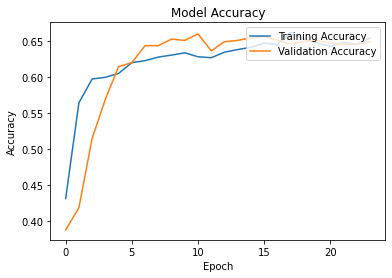

In [23]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# create confusion matrix
cm = confusion_matrix(y_test.to_numpy().argmax(axis=1), y_pred.argmax(axis=1))

# print confusion matrix
print(cm)


[[111   3  25  25]
 [  4 149   4  28]
 [ 35  10 109  16]
 [ 24  27  31  89]]


87/87 [==============================] - 0s 864us/step


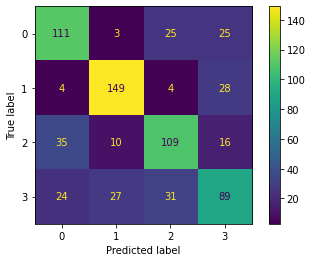

In [25]:
import numpy as np

y_predict = model.predict(X_train)

ConfusionMatrixDisplay(cm).plot()

In [26]:
# Save the model
model.save('my_model.h5')